In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [118]:
april_sale = pd.read_csv("Sales_Data/Sales_April_2019.csv")
april_sale.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Combine all the monthly dataset


In [119]:
from os import listdir 
from os.path import isfile, join


only_file = [f for f in listdir("./Sales_Data") if isfile(join("./Sales_Data", f))]
only_file

['Sales_October_2019.csv',
 'Sales_December_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_April_2019.csv',
 'Sales_November_2019.csv',
 'Sales_August_2019.csv',
 'Sales_September_2019.csv']

In [120]:
all_sales = pd.DataFrame()

for sale in only_file:
    monthy_sales = pd.read_csv("Sales_Data/" + sale)
    all_sales = pd.concat([all_sales, monthy_sales])

all_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [121]:
all_sales.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [122]:
all_sales.to_csv("all_sales.csv", index=False)

In [123]:
all_sales = pd.read_csv("all_sales.csv")
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


# Convert Order Date column to Datetime

In [124]:
all_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [161]:
all_sales.shape

(186305, 6)

In [125]:
all_sales["Order Date"] = all_sales["Order Date"].astype(str) 

In [126]:
all_types = []
for date in all_sales["Order Date"]:
    all_types.append(type(date))
all_types = pd.Series(all_types)  
all_types.value_counts()

<class 'str'>    186850
dtype: int64

In [132]:
#finding missing dates on the dataframa

not_dates = []
for date in all_sales["Order Date"]:
    if not date.startswith(("0", "1")):
        not_dates.append(date)

not_dates = pd.Series(not_dates)
not_dates.value_counts()

nan           545
Order Date    355
dtype: int64

In [131]:
all_sales.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date            0
Purchase Address    545
dtype: int64

In [133]:
all_sales.dropna(inplace=True)

In [135]:
all_sales.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [136]:
#finding missing dates on the dataframa

not_dates = []
for date in all_sales["Order Date"]:
    if not date.startswith(("0", "1")):
        not_dates.append(date)

not_dates = pd.Series(not_dates)
not_dates.value_counts()

Order Date    355
dtype: int64

In [147]:
cleaned_date = all_sales[all_sales["Order Date"]  != "Order Date"]

cleaned_date.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


In [148]:
not_dates = []
for date in cleaned_date["Order Date"]:
    if not date.startswith(("0", "1")):
        not_dates.append(date)

not_dates = pd.Series(not_dates)
not_dates.value_counts()

/home/geso/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


Series([], dtype: int64)

In [154]:
cleaned_date.loc["Order Date"] = pd.to_datetime(cleaned_date["Order Date"])

/home/geso/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [155]:
cleaned_date.head() 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,2019-10-28 10:56:00,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,2019-10-28 17:26:00,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,2019-10-24 17:20:00,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,2019-10-14 22:26:00,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,2019-10-07 16:10:00,"534 14th St, Los Angeles, CA 90001"


In [166]:
cleaned_date.sort_values(by=["Order Date"])

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
123730,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001"
124540,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016"
125893,149343,Apple Airpods Headphones,1,150,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001"
126547,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001"
125900,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301"
...,...,...,...,...,...,...
24012,299125,USB-C Charging Cable,1,11.95,2020-01-01 04:21:00,"754 Hickory St, New York City, NY 10001"
31046,305840,Bose SoundSport Headphones,1,99.99,2020-01-01 04:54:00,"784 River St, San Francisco, CA 94016"
25483,300519,Lightning Charging Cable,1,14.95,2020-01-01 05:13:00,"657 Spruce St, New York City, NY 10001"
25482,300519,Bose SoundSport Headphones,1,99.99,2020-01-01 05:13:00,"657 Spruce St, New York City, NY 10001"


In [169]:
cleaned_date.isna().sum()

Order ID            1
Product             1
Quantity Ordered    1
Price Each          1
Order Date          1
Purchase Address    1
dtype: int64

In [174]:
cleaned_date = cleaned_date.dropna()

In [176]:
cleaned_date.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [177]:
all_sales = cleaned_date.copy()
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,2019-10-28 10:56:00,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,2019-10-28 17:26:00,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,2019-10-24 17:20:00,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,2019-10-14 22:26:00,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,2019-10-07 16:10:00,"534 14th St, Los Angeles, CA 90001"


In [182]:
all_sales["Month"] = all_sales["Order Date"].apply(lambda x: x.month)
all_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,259358,34in Ultrawide Monitor,1,379.99,2019-10-28 10:56:00,"609 Cherry St, Dallas, TX 75001",10
1,259359,27in 4K Gaming Monitor,1,389.99,2019-10-28 17:26:00,"225 5th St, Los Angeles, CA 90001",10
2,259360,AAA Batteries (4-pack),2,2.99,2019-10-24 17:20:00,"967 12th St, New York City, NY 10001",10
3,259361,27in FHD Monitor,1,149.99,2019-10-14 22:26:00,"628 Jefferson St, New York City, NY 10001",10
4,259362,Wired Headphones,1,11.99,2019-10-07 16:10:00,"534 14th St, Los Angeles, CA 90001",10


In [193]:
monthly_sales = all_sales["Month"].value_counts()
monthly_sales

12    24984
10    20282
4     18279
11    17573
5     16566
3     15153
7     14293
6     13554
2     11975
8     11961
9     11621
1      9709
Name: Month, dtype: int64

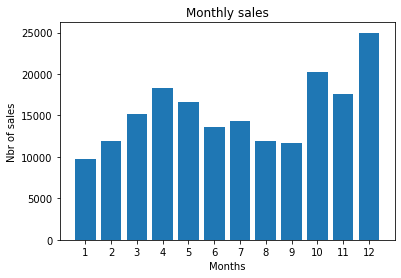

In [210]:
fig, ax = plt.subplots()

ax.bar(monthly_sales.index, monthly_sales.values)
ax.set_title(label="Monthly sales")
months = np.arange(0,12) + 1 
ax.set_xticks(months)
# ax.set_xticklabels(months)
ax.set_xlabel("Months")
ax.set_ylabel("Nbr of sales")
plt.show()

In [218]:
all_sales["Price Each"] = all_sales["Price Each"].astype("float64")

In [219]:
all_sales.pivot_table(index="Month", values="Price Each", aggfunc=np.sum)

,Price Each
Month,
1,1.811768e+06
2,2.188885e+06
3,2.791208e+06
4,3.367671e+06
5,3.135125e+06
6,2.562026e+06
7,2.632540e+06
8,2.230345e+06
9,2.084992e+06
